1. search_images (ddgs)
2. download images (fastcore?)
3. build dls (DataBlock(..).dataloaders(path))
4. build Learner
5. inference

In [1]:
!pip install -Uqq duckduckgo_search

In [3]:
from fastcore.all import * 
from duckduckgo_search import DDGS

In [4]:
def search_images(term, max_images=100):
    with DDGS(headers = {'Accept-Encoding': 'deflate, gzip, br'}) as ddgs:
        results = ddgs.images(keywords=term)
        images = [next(results).get("image") for _ in range(max_images)]
    return L(images)

In [8]:
img = search_images("cute dog", max_images=100)
img[0]

'https://inspirationseek.com/wp-content/uploads/2016/02/Cute-Dog-Photo.jpg'

In [9]:
from fastdownload import download_url
import os

download_url(url=img[0], dest='cute-dog.jpg', show_progress=False)

Path('cute-dog.jpg')

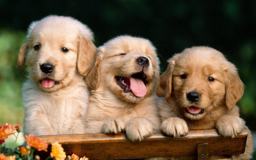

In [10]:
from fastai.vision.all import *

i = Image.open("cute-dog.jpg")
i.to_thumb(256)

In [13]:

path = Path("bird-or-dog")

In [12]:
from time import sleep
searches = "forest", "bird"

path = Path("bird-or-dog")

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest=dest, urls=search_images(f"{o} photos"))
    sleep(100)
    download_images(dest=dest, urls=search_images(f"{o} sun photos"))
    sleep(100)
    download_images(dest=dest, urls=search_images(f"{o} flower photos"))
    sleep(100)
    resize_images(path/o, max_size=400, dest=dest)

APIException: _get_url() https://duckduckgo.com/i.js

In [7]:
!ls

Untitled.ipynb	bird-or-dog  course22  cute-dog.jpg  fastbook


In [10]:
broken = verify_images(get_image_files(path))
broken.map(Path.unlink)
len(broken)

11

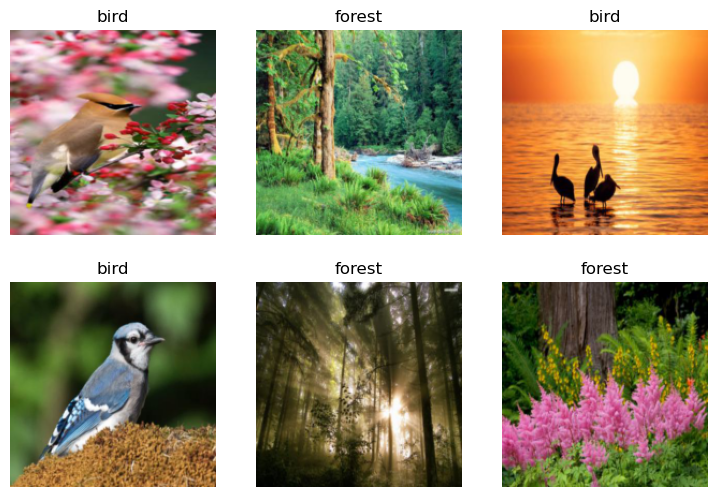

In [14]:
dls = DataBlock(
    blocks = (ImageBlock, CategoryBlock), 
    get_items=get_image_files,
    get_y=parent_label,
    splitter=RandomSplitter(valid_pct=0.2, seed=42069),
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [15]:
from fastai.vision.all import *

learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.547611,0.367152,0.078125,00:31


epoch,train_loss,valid_loss,error_rate,time


: 